In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
base_path = "drive/My Drive/landmark_1"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0,
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

Found 1350 images belonging to 25 classes.
Found 136 images belonging to 25 classes.


In [0]:
IMG_SHAPE = (224,224,3)
base_model = keras.applications.resnet.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3), classes=25)













94773248/94765736 [==============================] - 1s 0us/step


In [0]:
base_model.trainable = False
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [0]:
model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(25, activation='softmax')
])

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                51225     
Total params: 23,638,937
Trainable params: 51,225
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
batch_size = 64
epochs = 5
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator, shuffle = True,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              workers=4,
                              validation_data=validation_generator, 
                              validation_steps=validation_steps)



Epoch 1/5
21/21 [==============================] - 27s 1s/step - loss: 0.1750 - acc: 0.9601 - val_loss: 0.1821 - val_acc: 0.9600
Epoch 2/5
21/21 [==============================] - 21s 1s/step - loss: 0.1374 - acc: 0.9612 - val_loss: 0.1850 - val_acc: 0.9600
Epoch 3/5
21/21 [==============================] - 22s 1s/step - loss: 0.1055 - acc: 0.9650 - val_loss: 0.2041 - val_acc: 0.9600
Epoch 4/5
21/21 [==============================] - 20s 961ms/step - loss: 0.0917 - acc: 0.9701 - val_loss: 0.1993 - val_acc: 0.9600
Epoch 5/5
21/21 [==============================] - 7s 310ms/step - loss: 0.0696 - acc: 0.9771 - val_loss: 0.1952 - val_acc: 0.9567


[0.9601190260478428, 0.9611904763040089, 0.9650000191870189, 0.9701190704391116, 0.9771779358752666]
[0.9599999785423279, 0.9599999785423279, 0.9599999785423279, 0.9599999785423279, 0.9566666483879089]


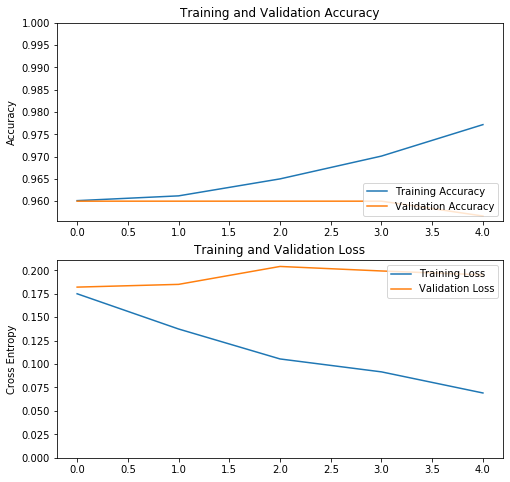

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)
print(val_acc)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [0]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  175


In [0]:
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr=2e-5),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                51225     
Total params: 23,638,937
Trainable params: 19,504,153
Non-trainable params: 4,134,784
_________________________________________________________________


In [0]:
batch_size = 64
epochs = 5
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size
history_fine = model.fit_generator(train_generator, 
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs, 
                                   workers=4,
                                   validation_data=validation_generator, 
                                   validation_steps=validation_steps)

Epoch 1/5
21/21 [==============================] - 15s 705ms/step - loss: 0.0593 - acc: 0.9792 - val_loss: 0.0479 - val_acc: 0.9825
Epoch 2/5
21/21 [==============================] - 4s 184ms/step - loss: 0.0513 - acc: 0.9836 - val_loss: 0.0259 - val_acc: 0.9925
Epoch 3/5
21/21 [==============================] - 5s 260ms/step - loss: 0.0480 - acc: 0.9838 - val_loss: 0.0261 - val_acc: 0.9913
Epoch 4/5
21/21 [==============================] - 5s 258ms/step - loss: 0.0500 - acc: 0.9839 - val_loss: 0.0285 - val_acc: 0.9888
Epoch 5/5
21/21 [==============================] - 7s 318ms/step - loss: 0.0378 - acc: 0.9887 - val_loss: 0.0323 - val_acc: 0.9900


{0: 'Ajantha Ellora Caves', 1: 'Basilica of Bom Jesus', 2: 'Char Minar', 3: 'Chhatrapati Shivaji Terminus', 4: 'Fort Aguada', 5: 'Gateway of India', 6: 'Gol Gumbaz', 7: 'Golden Temple', 8: 'Hampi', 9: 'Hawamahal', 10: 'Howrah Bridge', 11: 'India Gate', 12: 'Jama Masjid', 13: 'Jantar Mantar', 14: 'Konark Temple', 15: 'Lotus Temple', 16: 'Matri Mandir', 17: 'Meenakshi Temple', 18: 'Puri Jagnnath Temple', 19: 'Qutub Minar', 20: 'Red Fort', 21: 'Sanchi Stupa', 22: 'Statue of Unity', 23: 'Taj Mahal', 24: 'Victoria Memorial'}
400
136
400


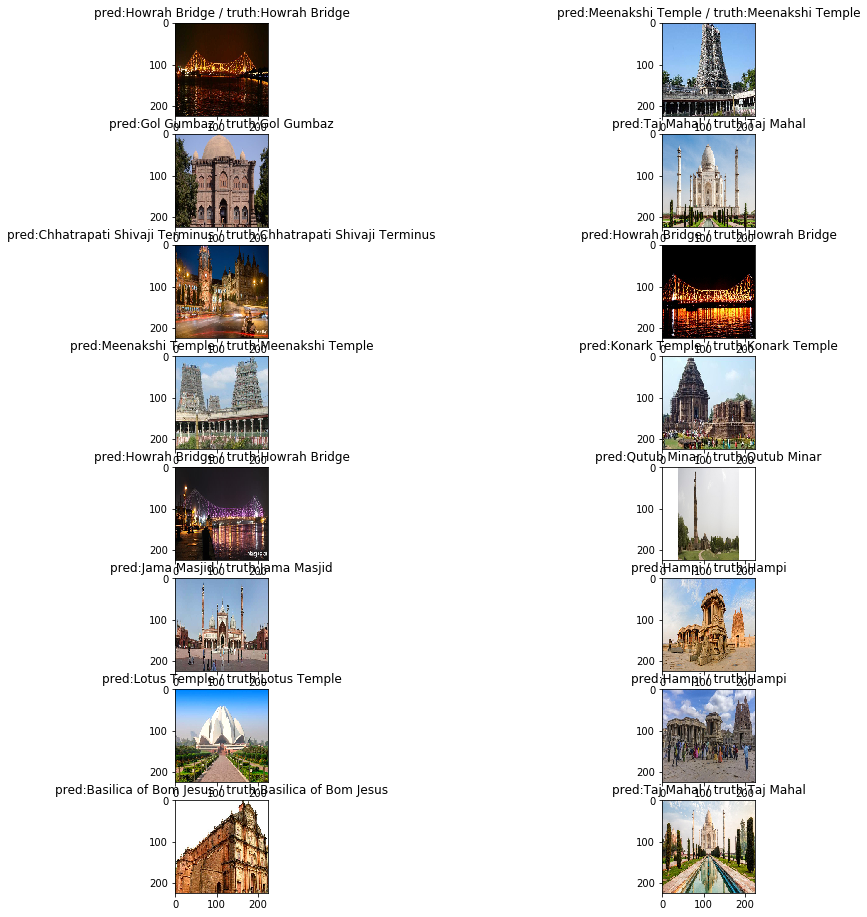

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
test_x, test_y = validation_generator.__getitem__(1)
print(labels)
print(test_y.size)
print(validation_generator.n)
preds = model.predict(test_x)
print(preds.size)
plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(8, 2, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [0]:
image_path = "drive/My Drive/gateway-of-india-tipl-1.jpg"
from keras.preprocessing.image import load_img
img = load_img(image_path, target_size = (224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255
p = model.predict(x)
#print(p)
i = np.argmax(p,1).squeeze()
i = int(i)
print(labels[i])

Gateway of India


[0.9793865227260472, 0.9835714442389352, 0.9838095392499652, 0.9839285867554801, 0.9886904869760785]
[0.9825000166893005, 0.9925000071525574, 0.9912500083446503, 0.9887500107288361, 0.9900000095367432]


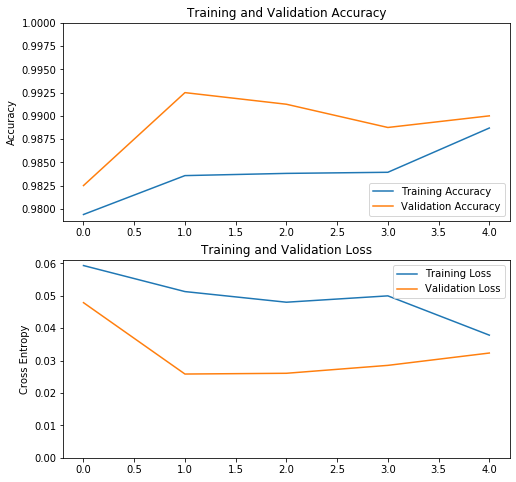

In [0]:
acc = history_fine.history['acc']
val_acc = history_fine.history['val_acc']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']
print(acc)
print(val_acc)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [0]:
image_path = "drive/My Drive/do_not_touch/cliche-taj.jpg"
img = load_img(image_path, target_size = (224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255
p = model.predict(x)
#print(p)
i = np.argmax(p,1).squeeze()
i = int(i)
print(labels[i])

Taj Mahal
